<a href="https://colab.research.google.com/github/B00138946/Data-Analysis-Assignment-4th-year-/blob/main/Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline
import warnings;
warnings.filterwarnings("ignore");
import xgboost;
from sklearn.model_selection import train_test_split, cross_val_predict;
from sklearn.tree import DecisionTreeClassifier as DTC;
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.neighbors import LocalOutlierFactor;
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV;





In [ ]:
data = pd.read_csv('studentData.csv')

In [ ]:
data = pd.read_csv('studentData.csv', sep=';')
data.head()

,AcademicYear,ExtrinsicMotivation,GroupWork,IntrinsicMotivation,SelfEfficacy,SelfRegulation,StudyEffort,StudyTime,Openness,Conscientiousness,...,HighSchoolEnglish,HighSchoolMaths,Sex,Age,Discipline,Course,Modality,LearningStyle,id,Label
0,2017.0,7.2,7.5,5.2,8.9,NaN,4.4,5.3,7.9,6.6,...,74.0,63.0,male,19.0,Business,BusinessWithIT,Visual,Deep,1,Pass
1,2017.0,6.6,5.5,2.3,2.8,NaN,3.1,4.4,2.8,3.3,...,63.0,54.0,male,19.0,Business,BusinessWithIT,Kinaesthetic,Strategic,4,Fail
2,2017.0,8.5,2.3,4.3,4.3,NaN,6.3,5.3,3.9,4.9,...,63.0,48.0,male,22.0,Computing,Computing,Visual,Shallow,5,Fail
3,2017.0,9.1,6.7,4.6,5.1,NaN,6.6,6.9,4.0,5.6,...,55.0,43.0,male,18.0,Computing,Computing,Visual,Shallow,6,Fail
4,2017.0,7.1,0.8,4.7,3.8,NaN,6.4,5.6,4.2,4.9,...,71.0,51.0,male,24.0,Computing,Computing,Visual,Shallow,10,Fail


In [ ]:
data.shape

(1240, 21)

In [ ]:
data.isnull().sum()

AcademicYear             5
ExtrinsicMotivation      1
GroupWork                1
IntrinsicMotivation      2
SelfEfficacy             1
SelfRegulation         936
StudyEffort              1
StudyTime                2
Openness                 0
Conscientiousness        0
HighSchoolAverage        5
HighSchoolEnglish        5
HighSchoolMaths          5
Sex                      5
Age                      5
Discipline               5
Course                   5
Modality               106
LearningStyle            0
id                       0
Label                    0
dtype: int64

1240 rows, 1 colums



In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcademicYear         1235 non-null   float64
 1   ExtrinsicMotivation  1239 non-null   float64
 2   GroupWork            1239 non-null   float64
 3   IntrinsicMotivation  1238 non-null   float64
 4   SelfEfficacy         1239 non-null   float64
 5   SelfRegulation       304 non-null    float64
 6   StudyEffort          1239 non-null   float64
 7   StudyTime            1238 non-null   float64
 8   Openness             1240 non-null   float64
 9   Conscientiousness    1240 non-null   float64
 10  HighSchoolAverage    1235 non-null   float64
 11  HighSchoolEnglish    1235 non-null   float64
 12  HighSchoolMaths      1235 non-null   float64
 13  Sex                  1235 non-null   object 
 14  Age                  1235 non-null   float64
 15  Discipline           1235 non-null   o

In [ ]:
data.describe()

,AcademicYear,ExtrinsicMotivation,GroupWork,IntrinsicMotivation,SelfEfficacy,SelfRegulation,StudyEffort,StudyTime,Openness,Conscientiousness,HighSchoolAverage,HighSchoolEnglish,HighSchoolMaths,Age,id
count,1235.000000,1239.000000,1239.000000,1238.000000,1239.000000,304.000000,1239.000000,1238.000000,1240.000000,1240.000000,1235.000000,1235.000000,1235.000000,1235.000000,1240.000000
mean,2016.048583,6.699274,6.478854,5.539661,5.788781,4.684211,5.391445,6.101131,4.592903,5.399194,60.761862,57.936032,51.376518,23.450202,1212.095968
std,0.791509,1.999852,2.841151,1.626136,1.931892,1.420668,1.624298,1.998216,1.607242,1.478460,8.727119,8.644704,7.254905,5.882954,703.282563
min,2015.000000,0.200000,0.000000,0.000000,1.100000,0.200000,0.500000,0.000000,0.000000,0.000000,40.000000,40.000000,40.000000,18.000000,1.000000
25%,2015.000000,5.600000,4.300000,4.400000,4.700000,3.775000,4.400000,4.700000,3.500000,4.400000,55.850000,52.000000,46.000000,19.000000,602.750000
50%,2016.000000,6.700000,7.200000,5.600000,5.800000,4.800000,5.400000,6.000000,4.500000,5.400000,61.800000,59.000000,51.000000,21.000000,1205.000000
75%,2017.000000,7.800000,8.900000,6.600000,6.600000,5.500000,6.600000,7.600000,5.600000,6.400000,67.100000,64.000000,57.000000,25.000000,1808.250000
max,2017.000000,45.000000,10.000000,10.000000,45.000000,8.500000,10.000000,10.000000,9.800000,10.000000,79.800000,80.000000,73.000000,51.000000,2459.000000


In [ ]:
data.describe(include='object')


,Sex,Discipline,Course,Modality,LearningStyle,Label
count,1235,1235,1235,1134,1240,1240
unique,2,4,9,3,3,2
top,male,Humanities,Computing,Visual,Deep,Pass
freq,658,449,219,881,669,721


In [ ]:
data.sample(10)

,AcademicYear,ExtrinsicMotivation,GroupWork,IntrinsicMotivation,SelfEfficacy,SelfRegulation,StudyEffort,StudyTime,Openness,Conscientiousness,...,HighSchoolEnglish,HighSchoolMaths,Sex,Age,Discipline,Course,Modality,LearningStyle,id,Label
535,2015.0,5.9,7.5,6.2,7.4,NaN,7.2,4.9,4.1,3.5,...,72.0,58.0,male,20.0,Computing,CreativeDigitalMedia,Kinaesthetic,Deep,1027,Pass
771,2016.0,7.5,9.1,6.8,4.0,4.8,5.9,7.6,2.1,5.2,...,51.0,47.0,male,33.0,Humanities,CommunityDev,Visual,Shallow,1506,Pass
302,2017.0,7.6,9.4,6.6,6.6,NaN,7.2,5.9,3.5,6.6,...,63.0,59.0,male,21.0,Business,Business,Visual,Strategic,589,Pass
665,2017.0,5.0,8.2,5.6,6.6,4.0,3.9,5.9,7.4,3.2,...,62.0,54.0,female,20.0,Computing,CreativeDigitalMedia,Visual,Strategic,1293,Pass
1084,2017.0,5.5,3.9,6.4,6.6,NaN,7.2,9.5,3.3,7.2,...,58.0,56.0,male,31.0,Computing,CreativeDigitalMedia,Visual,Deep,2130,Pass
670,2016.0,8.3,9.6,7.1,9.7,5.5,7.2,7.5,4.0,8.5,...,54.0,54.0,male,28.0,Computing,CreativeDigitalMedia,Visual,Deep,1303,Pass
180,2015.0,6.5,9.1,5.8,6.7,6.4,6.7,8.6,3.9,6.5,...,46.0,56.0,male,25.0,Humanities,AppliedSocialCare,Kinaesthetic,Shallow,364,Fail
255,2016.0,4.0,9.6,2.6,7.7,NaN,2.8,1.2,6.2,4.9,...,70.0,46.0,male,19.0,Computing,CreativeDigitalMedia,Visual,Shallow,504,Fail
215,2017.0,9.8,7.7,8.2,6.6,5.0,5.5,7.6,5.4,5.5,...,57.0,68.0,male,22.0,Computing,Computing,Visual,Deep,439,Pass
320,2017.0,6.1,3.5,4.3,7.5,NaN,3.3,5.5,4.3,6.8,...,61.0,50.0,male,21.0,Business,Business,Kinaesthetic,Strategic,628,Fail


In [ ]:
data.SelfRegulation

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1235   NaN
1236   NaN
1237   NaN
1238   NaN
1239   NaN
Name: SelfRegulation, Length: 1240, dtype: float64

Text(0.5, 1.0, 'Ages of Students Histogram')

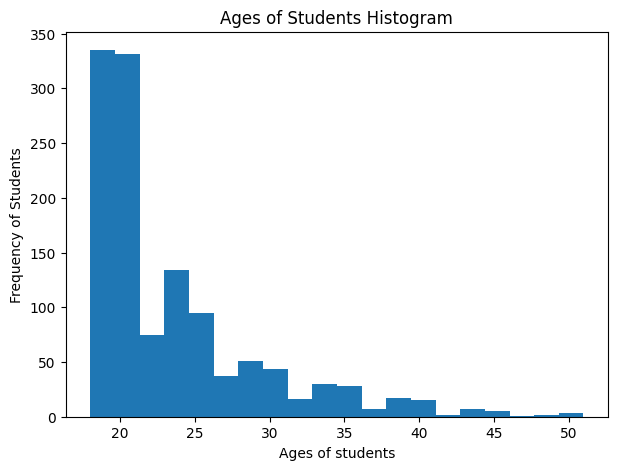

In [ ]:
plt.figure(figsize= (7, 5))
plt.hist(x= data.Age, bins=20)
plt.xlabel('Ages of students')
plt.ylabel('Frequency of Students')
plt.title('Ages of Students Histogram')

Text(0.5, 1.0, 'Effort put in Studying Histogram')

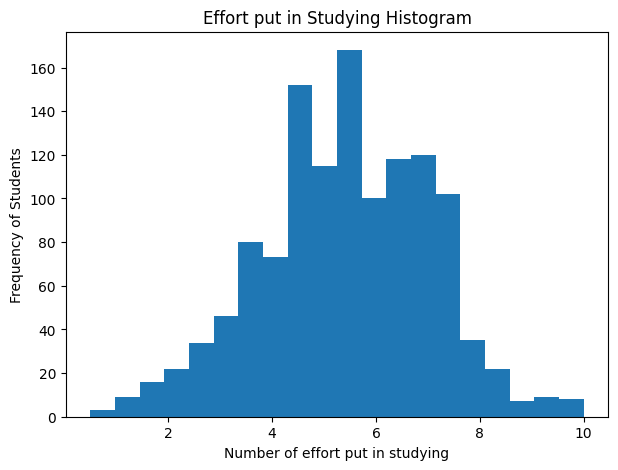

In [ ]:
plt.figure(figsize= (7, 5))
plt.hist(x= data.StudyEffort, bins=20)
plt.xlabel('Number of effort put in studying')
plt.ylabel('Frequency of Students')
plt.title('Effort put in Studying Histogram')

Text(0.5, 1.0, 'StudyTime Histogram')

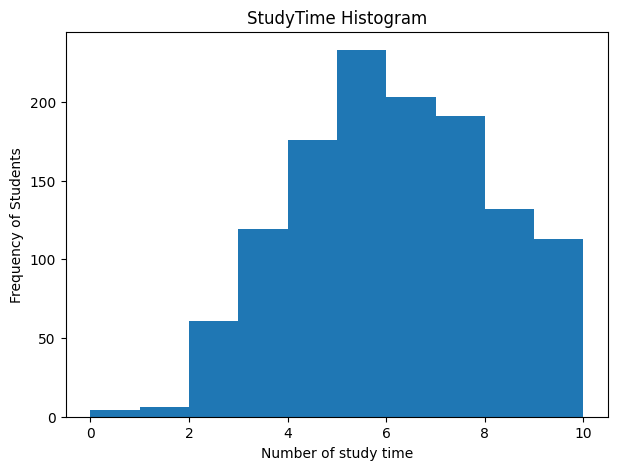

In [ ]:
plt.figure(figsize= (7, 5))
plt.hist(x= data.StudyTime)
plt.xlabel('Number of study time')
plt.ylabel('Frequency of Students')
plt.title('StudyTime Histogram')

In [ ]:
numeric_data = data[['StudyTime','StudyEffort', 'Age']]

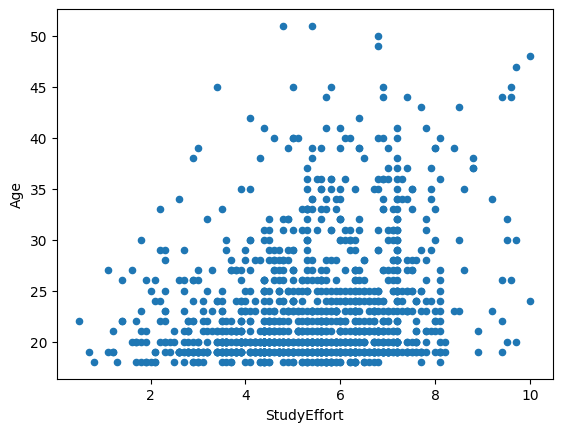

In [ ]:
data.plot.scatter(x = 'StudyEffort', y='Age')

plt.show()

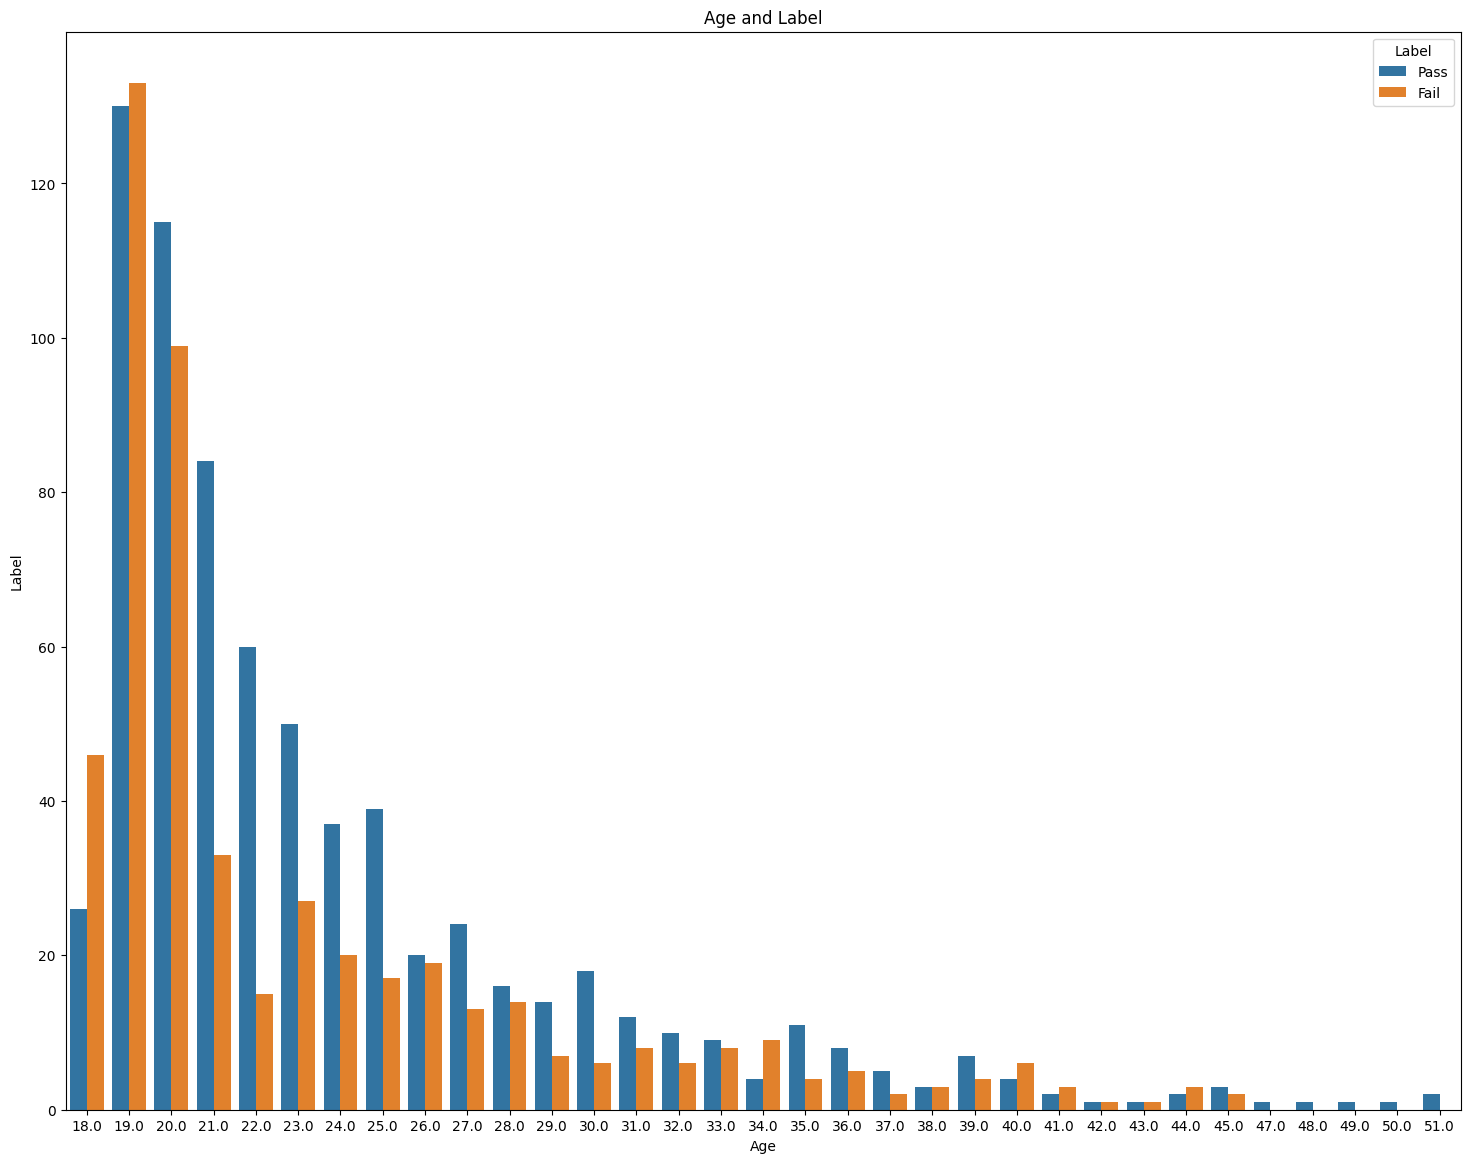

In [ ]:
plt.figure(figsize=(18, 14))
sns.countplot(x='Age', hue='Label', data=data)
plt.title('Age and Label')
plt.xlabel('Age')
plt.ylabel('Label')
plt.show()


Text(0.5, 1.0, 'SelfRegulation of Students Histogram')

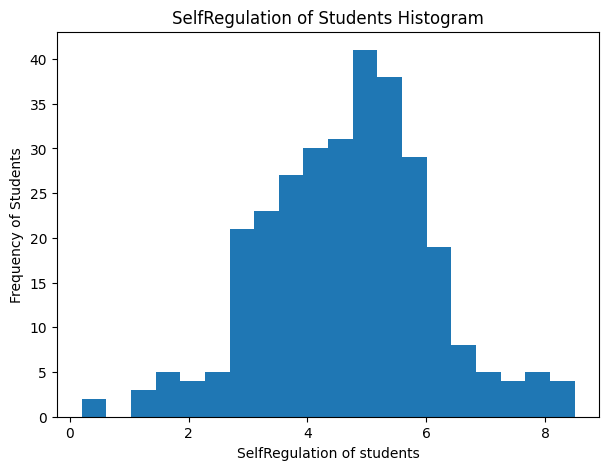

In [ ]:
plt.figure(figsize= (7, 5))
plt.hist(x= data.SelfRegulation, bins=20)
plt.xlabel('SelfRegulation of students')
plt.ylabel('Frequency of Students')
plt.title('SelfRegulation of Students Histogram')

<Axes: >

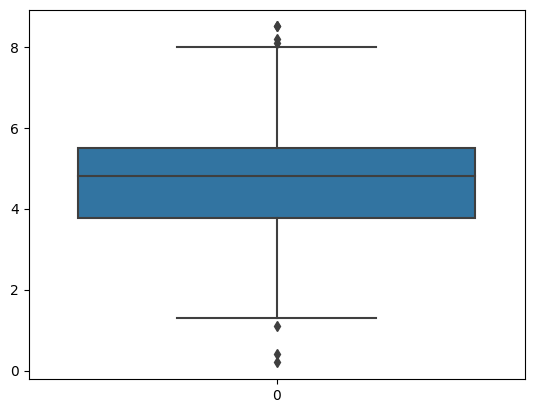

In [ ]:
sns.boxplot(data['SelfRegulation'])

Text(0.5, 1.0, 'SelfRegulation of Students Histogram')

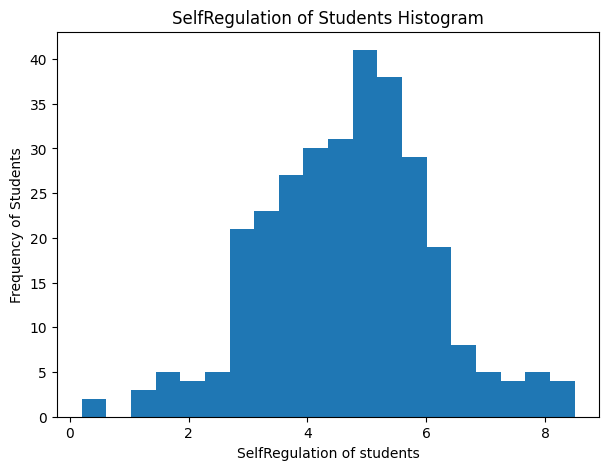

In [ ]:
plt.figure(figsize= (7, 5))
plt.hist(x= data.SelfRegulation, bins=20)
plt.xlabel('SelfRegulation of students')
plt.ylabel('Frequency of Students')
plt.title('SelfRegulation of Students Histogram')

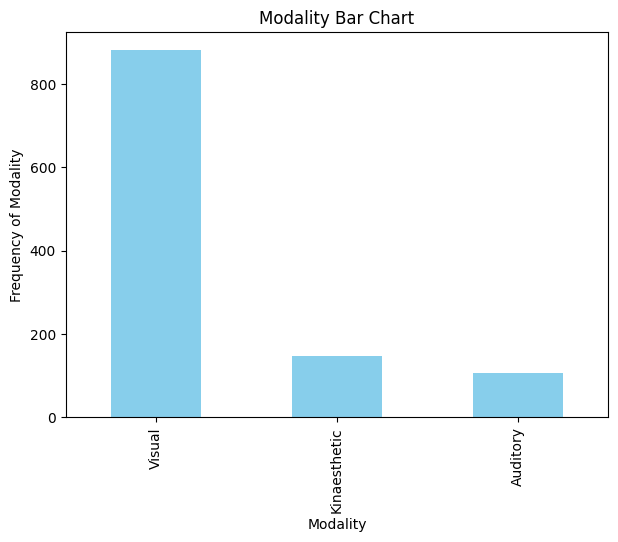

In [ ]:
plt.figure(figsize=(7, 5))
data['Modality'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Modality')
plt.ylabel('Frequency of Modality')
plt.title('Modality Bar Chart')
plt.show()

**Baseline using Split-Validation for evaluating sklearn Decision Tree model**


In [ ]:
## separate the class label from regular attributes
y = data[['Label']]
X = data[data.columns.difference(['Label'])]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcademicYear         1235 non-null   float64
 1   Age                  1235 non-null   float64
 2   Conscientiousness    1240 non-null   float64
 3   Course               1235 non-null   object 
 4   Discipline           1235 non-null   object 
 5   ExtrinsicMotivation  1239 non-null   float64
 6   GroupWork            1239 non-null   float64
 7   HighSchoolAverage    1235 non-null   float64
 8   HighSchoolEnglish    1235 non-null   float64
 9   HighSchoolMaths      1235 non-null   float64
 10  IntrinsicMotivation  1238 non-null   float64
 11  LearningStyle        1240 non-null   object 
 12  Modality             1134 non-null   object 
 13  Openness             1240 non-null   float64
 14  SelfEfficacy         1239 non-null   float64
 15  SelfRegulation       304 non-null    f

In [ ]:
## 1.make a copy of the data
baseline_sklearn_data = X.copy()
## 2.replace nan values
## 2.1. get the names of the numerical columns and replace nans in those with 0
num_cols = baseline_sklearn_data.select_dtypes(include=['int64', 'float64']).columns
baseline_sklearn_data[num_cols] = baseline_sklearn_data[num_cols].apply(lambda col: col.fillna(0, axis=0))
## 2.2. get the names of the objct columns and replace nans in those with '?'
obj_cols = baseline_sklearn_data.select_dtypes(include=['object', 'category']).columns
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(lambda col: col.fillna('?', axis=0))
## 3. convert the categorical/object columns to numeric columns
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(LabelEncoder().fit_transform)
print(baseline_sklearn_data.info())
baseline_sklearn_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcademicYear         1240 non-null   float64
 1   Age                  1240 non-null   float64
 2   Conscientiousness    1240 non-null   float64
 3   Course               1240 non-null   int64  
 4   Discipline           1240 non-null   int64  
 5   ExtrinsicMotivation  1240 non-null   float64
 6   GroupWork            1240 non-null   float64
 7   HighSchoolAverage    1240 non-null   float64
 8   HighSchoolEnglish    1240 non-null   float64
 9   HighSchoolMaths      1240 non-null   float64
 10  IntrinsicMotivation  1240 non-null   float64
 11  LearningStyle        1240 non-null   int64  
 12  Modality             1240 non-null   int64  
 13  Openness             1240 non-null   float64
 14  SelfEfficacy         1240 non-null   float64
 15  SelfRegulation       1240 non-null   f

,AcademicYear,Age,Conscientiousness,Course,Discipline,ExtrinsicMotivation,GroupWork,HighSchoolAverage,HighSchoolEnglish,HighSchoolMaths,IntrinsicMotivation,LearningStyle,Modality,Openness,SelfEfficacy,SelfRegulation,Sex,StudyEffort,StudyTime,id
676,2017.0,36.0,5.7,6,2,6.0,7.5,53.2,53.0,44.0,6.0,0,2,5.7,7.7,5.6,2,5.5,7.6,1318
1058,2017.0,19.0,3.5,5,2,6.2,8.2,62.3,65.0,52.0,6.5,1,0,4.7,4.7,0.0,2,2.6,4.9,2076
1121,2016.0,24.0,8.0,8,3,9.5,10.0,54.5,45.0,48.0,7.5,0,3,6.2,8.8,0.0,1,7.6,10.0,2209
735,2017.0,18.0,5.6,2,1,9.0,9.9,69.1,63.0,60.0,4.3,2,0,2.4,6.6,4.2,1,5.4,7.3,1440
261,2017.0,19.0,7.4,8,3,10.0,10.0,70.3,62.0,58.0,7.5,0,3,2.3,6.6,0.0,2,5.6,9.1,513
44,2016.0,30.0,5.6,3,1,6.3,5.1,46.1,41.0,40.0,5.5,2,3,1.7,5.1,0.0,2,4.1,4.9,84
911,2016.0,39.0,3.7,1,4,6.3,4.0,40.0,40.0,40.0,4.8,0,3,5.1,5.9,0.0,1,4.9,4.4,1772
69,2016.0,26.0,6.7,4,4,7.8,7.2,51.5,51.0,50.0,5.0,0,3,2.5,5.0,0.0,1,5.3,5.4,148
478,2016.0,25.0,8.7,8,3,10.0,10.0,46.7,46.0,41.0,8.3,0,0,7.4,9.7,0.0,2,7.4,9.5,912
992,2015.0,20.0,5.2,2,1,5.6,6.9,59.2,52.0,57.0,3.1,0,3,3.8,6.0,0.0,1,6.0,6.5,1946


In [ ]:
## Use a ratio of 70% training - 30% testing
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)

## Create a decision tree classifier
sk_dt = DTC()

## Train the decision tree model
sk_dt.fit(X_train, y_train)

## Make predictions on the test portion
predictions = sk_dt.predict(X_test)

## Check the predicted labels against the actual labels stored in y_test and output various scores
print(classification_report(y_test, predictions))

## Output the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)


              precision    recall  f1-score   support

        Fail       0.73      0.69      0.71       149
        Pass       0.80      0.83      0.81       223

    accuracy                           0.77       372
   macro avg       0.76      0.76      0.76       372
weighted avg       0.77      0.77      0.77       372

[[103  46]
 [ 39 184]]


**Handling with Missing Data**

In [ ]:
## drop the rows where with attributes missing less than 5%
data1 = data.copy();
data1 = data1.dropna(subset=['AcademicYear', 'ExtrinsicMotivation', 'GroupWork', 'IntrinsicMotivation',
                             'SelfEfficacy', 'StudyEffort', 'StudyTime', 'HighSchoolAverage', 'HighSchoolEnglish',
                             'HighSchoolMaths', 'Sex', 'Age', 'Discipline', 'Course']);
data1.info()
# Split validatiuon using ratio of 70% training - 30% testing
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)
sk_dt = DTC()
## first train it on the train portion of X and y
sk_dt.fit(X_train, y_train)
# Make predictions on the test portion
predictions = sk_dt.predict(X_test)
report = classification_report(y_test, predictions)
print(report)
# Output the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1234
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcademicYear         1235 non-null   float64
 1   ExtrinsicMotivation  1235 non-null   float64
 2   GroupWork            1235 non-null   float64
 3   IntrinsicMotivation  1235 non-null   float64
 4   SelfEfficacy         1235 non-null   float64
 5   SelfRegulation       304 non-null    float64
 6   StudyEffort          1235 non-null   float64
 7   StudyTime            1235 non-null   float64
 8   Openness             1235 non-null   float64
 9   Conscientiousness    1235 non-null   float64
 10  HighSchoolAverage    1235 non-null   float64
 11  HighSchoolEnglish    1235 non-null   float64
 12  HighSchoolMaths      1235 non-null   float64
 13  Sex                  1235 non-null   object 
 14  Age                  1235 non-null   float64
 15  Discipline           1235 non-null   o

In [ ]:
## remove the SelfRegulation column
data1 = data1.drop(['SelfRegulation'], axis=1);
data1.info()
# Split validatiuon using ratio of 70% training - 30% testing
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)

sk_dt = DTC()

## first train it on the train portion of X and y
sk_dt.fit(X_train, y_train)

# Make predictions on the test portion
predictions = sk_dt.predict(X_test)

report = classification_report(y_test, predictions)
print(report)

# Output the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1234
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcademicYear         1235 non-null   float64
 1   ExtrinsicMotivation  1235 non-null   float64
 2   GroupWork            1235 non-null   float64
 3   IntrinsicMotivation  1235 non-null   float64
 4   SelfEfficacy         1235 non-null   float64
 5   StudyEffort          1235 non-null   float64
 6   StudyTime            1235 non-null   float64
 7   Openness             1235 non-null   float64
 8   Conscientiousness    1235 non-null   float64
 9   HighSchoolAverage    1235 non-null   float64
 10  HighSchoolEnglish    1235 non-null   float64
 11  HighSchoolMaths      1235 non-null   float64
 12  Sex                  1235 non-null   object 
 13  Age                  1235 non-null   float64
 14  Discipline           1235 non-null   object 
 15  Course               1235 non-null   o

In [ ]:
# Try to replace Modality's missing data with mode
data10 = data1.copy()
mode_value = data10['Modality'].mode()[0]
data10['Modality'] = data10['Modality'].fillna(mode_value)

data10.Modality
# Split validatiuon using ratio of 70% training - 30% testing
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)

sk_dt = DTC()

## first train it on the train portion of X and y
sk_dt.fit(X_train, y_train)

# Make predictions on the test portion
predictions = sk_dt.predict(X_test)

report = classification_report(y_test, predictions)
print(report)

# Output the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

        Fail       0.74      0.72      0.73       149
        Pass       0.82      0.83      0.82       223

    accuracy                           0.79       372
   macro avg       0.78      0.78      0.78       372
weighted avg       0.79      0.79      0.79       372

[[108  41]
 [ 38 185]]


**Removing** **outliers**

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
baseline_sklearn_data = X.copy()
baseline_sklearn_data[num_cols] = baseline_sklearn_data[num_cols].apply(lambda col: col.fillna(0, axis=0))
baseline_sklearn_data[cat_cols] = baseline_sklearn_data[cat_cols].apply(lambda col: col.fillna('?', axis=0))
baseline_sklearn_data[cat_cols] = baseline_sklearn_data[cat_cols].apply(LabelEncoder().fit_transform)

## Apply LOF for outlier detection
lof = LocalOutlierFactor()
outlier_scores = lof.fit_predict(baseline_sklearn_data)
outliers_mask = (outlier_scores == -1)
## Removing outliers
X_no_outliers = baseline_sklearn_data[~outliers_mask]
y_no_outliers = y[~outliers_mask]

# #Use a ratio of 70% training - 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=1)
sk_dt = DTC()

sk_dt.fit(X_train, y_train)
predictions = sk_dt.predict(X_test)


print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

        Fail       0.74      0.71      0.72       150
        Pass       0.81      0.83      0.82       221

    accuracy                           0.78       371
   macro avg       0.77      0.77      0.77       371
weighted avg       0.78      0.78      0.78       371

[[106  44]
 [ 38 183]]


**Hyperparameter Tuning of the Decision Tree**

In [ ]:
baseline_sklearn_data = X.copy()
num_cols = baseline_sklearn_data.select_dtypes(include=['int64', 'float64']).columns
baseline_sklearn_data[num_cols] = baseline_sklearn_data[num_cols].apply(lambda col: col.fillna(0, axis=0))
obj_cols = baseline_sklearn_data.select_dtypes(include=['object', 'category']).columns
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(lambda col: col.fillna('?', axis=0))
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(LabelEncoder().fit_transform)
baseline_sklearn_data.sample(10)
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)

## Criterion
dtc = DTC(criterion='entropy', random_state=1)

dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

        Fail       0.69      0.73      0.71       149
        Pass       0.81      0.78      0.80       223

    accuracy                           0.76       372
   macro avg       0.75      0.76      0.76       372
weighted avg       0.77      0.76      0.76       372

[[109  40]
 [ 48 175]]


In [ ]:
baseline_sklearn_data = X.copy()
num_cols = baseline_sklearn_data.select_dtypes(include=['int64', 'float64']).columns
baseline_sklearn_data[num_cols] = baseline_sklearn_data[num_cols].apply(lambda col: col.fillna(0, axis=0))
obj_cols = baseline_sklearn_data.select_dtypes(include=['object', 'category']).columns
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(lambda col: col.fillna('?', axis=0))
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(LabelEncoder().fit_transform)
baseline_sklearn_data.sample(10)
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)

## changin the impurity threshold
dtc = DTC(min_impurity_decrease=0.01, random_state=1);
dtc.fit(X_train, y_train)

predictions = dtc.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

        Fail       0.73      0.50      0.59       149
        Pass       0.72      0.88      0.79       223

    accuracy                           0.73       372
   macro avg       0.73      0.69      0.69       372
weighted avg       0.73      0.73      0.71       372

[[ 74  75]
 [ 27 196]]


In [ ]:
baseline_sklearn_data = X.copy()
num_cols = baseline_sklearn_data.select_dtypes(include=['int64', 'float64']).columns
baseline_sklearn_data[num_cols] = baseline_sklearn_data[num_cols].apply(lambda col: col.fillna(0, axis=0))
obj_cols = baseline_sklearn_data.select_dtypes(include=['object', 'category']).columns
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(lambda col: col.fillna('?', axis=0))
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(LabelEncoder().fit_transform)
baseline_sklearn_data.sample(10)
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)

## change the depth of the tree
dtc = DTC(max_depth=5, random_state=1);
dtc.fit(X_train, y_train)

predictions = dtc.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

        Fail       0.60      0.74      0.66       149
        Pass       0.80      0.66      0.72       223

    accuracy                           0.70       372
   macro avg       0.70      0.70      0.69       372
weighted avg       0.72      0.70      0.70       372

[[111  38]
 [ 75 148]]


In [ ]:
baseline_sklearn_data = X.copy()
num_cols = baseline_sklearn_data.select_dtypes(include=['int64', 'float64']).columns
baseline_sklearn_data[num_cols] = baseline_sklearn_data[num_cols].apply(lambda col: col.fillna(0, axis=0))
obj_cols = baseline_sklearn_data.select_dtypes(include=['object', 'category']).columns
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(lambda col: col.fillna('?', axis=0))
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(LabelEncoder().fit_transform)
baseline_sklearn_data.sample(10)
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)

## Changing the number of rows or samples that is needed in spliting the internal node
dtc = DTC(min_samples_split=10, random_state=1);
dtc.fit(X_train, y_train)

predictions = dtc.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

        Fail       0.68      0.71      0.70       149
        Pass       0.80      0.78      0.79       223

    accuracy                           0.75       372
   macro avg       0.74      0.75      0.74       372
weighted avg       0.75      0.75      0.75       372

[[106  43]
 [ 49 174]]


In [ ]:
baseline_sklearn_data = X.copy()
num_cols = baseline_sklearn_data.select_dtypes(include=['int64', 'float64']).columns
baseline_sklearn_data[num_cols] = baseline_sklearn_data[num_cols].apply(lambda col: col.fillna(0, axis=0))
obj_cols = baseline_sklearn_data.select_dtypes(include=['object', 'category']).columns
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(lambda col: col.fillna('?', axis=0))
baseline_sklearn_data[obj_cols] = baseline_sklearn_data[obj_cols].apply(LabelEncoder().fit_transform)
baseline_sklearn_data.sample(10)
X_train, X_test, y_train, y_test = train_test_split(baseline_sklearn_data, y, test_size=0.3, random_state=1)

## Changing the number of rows or samples that is needed at a leaf
dtc = DTC(min_samples_leaf=5, random_state=1);
dtc.fit(X_train, y_train)

predictions = dtc.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

        Fail       0.68      0.74      0.71       149
        Pass       0.81      0.77      0.79       223

    accuracy                           0.76       372
   macro avg       0.75      0.75      0.75       372
weighted avg       0.76      0.76      0.76       372

[[110  39]
 [ 52 171]]


In [ ]:
## Using the grid search to find the best set of paremeters
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 11),
    'min_samples_split': range(5, 16),
    'min_samples_leaf': range(3, 10),
    'min_impurity_decrease': [0.01, 0.02, 0.03]
}

grid_search = GridSearchCV(DTC(random_state=1), param_grid=params, verbose=2)

grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)


Streaming output truncated to the last 5000 lines.
[CV] END criterion=entropy, max_depth=6, min_impurity_decrease=0.03, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_impurity_decrease=0.03, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_impurity_decrease=0.03, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_impurity_decrease=0.03, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_impurity_decrease=0.03, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_impurity_decrease=0.03, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_impurity_decrease=0.03, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_i

ValueError: ignored